In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
np.random.seed(0)
X,y = make_moons(400, noise=0.1)

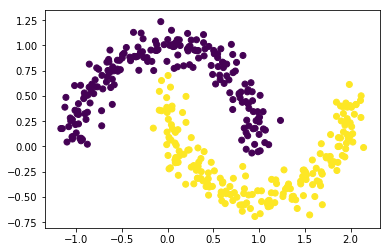

In [3]:
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
logistic = LogisticRegression()
logistic.fit(X,y)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
def plot_decision_boundary(pred_func):
    x1 = np.arange(min(X[:,0]) - 1, max(X[:,0]) + 1, 0.01)
    x2 = np.arange(min(X[:,1]) - 1, max(X[:,1]) + 1, 0.01)
    xx,yy = np.meshgrid(x1,x2)
    z = pred_func(np.c_[xx.flatten(), yy.flatten()])
    z = z.reshape(xx.shape)
    plt.contourf(xx,yy,z,cmap=plt.cm.Spectral)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=ListedColormap(('white','red')))

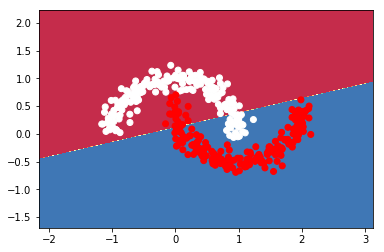

In [6]:
plot_decision_boundary( lambda x : logistic.predict(x))

In [7]:
svm = SVC(kernel='rbf',gamma='auto')
svm.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

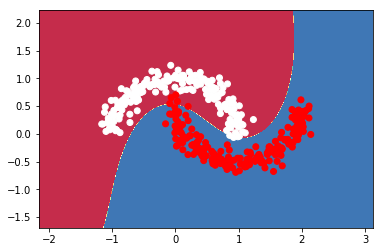

In [8]:
plot_decision_boundary( lambda x : svm.predict(x))

In [9]:
num_examples = len(X)
input_neuron = 2
output_neuron = 2
alpha = 0.01

In [10]:
def calculate_loss(model):
    w1,b1,w2,b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = np.dot(X,w1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1,w2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
#     loss
    correct_logprob = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprob)
    return data_loss

In [11]:
def predict(model,x):
    w1,b1,w2,b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = np.dot(X,w1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1,w2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs,axis=1)

In [12]:
def build_model(hidden_layer,epochs,print_loss=False):
    np.random.seed(0)
    W1 = np.random.randn(input_neuron, hidden_layer)
    b1 = np.zeros((1,hidden_layer))
    W2 = np.random.randn(hidden_layer,output_neuron)
    b2 = np.zeros((1,output_neuron))
    model = {}
    
    for i in range(epochs):
        # forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1,keepdims=True)
        
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples),y] -= 1
        delta_W2 = (a1.T).dot(delta3)
        delta_b2 = np.sum(delta3, axis = 0, keepdims=True)
        
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1,2))
        delta_W1 = np.dot(X.T, delta2)
        delta_b1 = np.sum(delta2, axis = 0)
        
        # Adding regularization
#         delta_W2 += reg_lambda * W2
#         delta_W1 += reg_lambda * W1
        
        # Gradient Descent parameter update
        W1 += -alpha * delta_W1
        b1 += -alpha * delta_b1
        W2 += -alpha * delta_W2
        b2 += -alpha * delta_b2
        
        model = {'W1':W1,'b1':b1,'W2':W2,'b2':b2}
        
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i : %f"%(i, calculate_loss(model)))
    
    return model

In [14]:
# Network with hidden layer of size 3
model = build_model(3,20000, print_loss=True)

Loss after iteration 0 : 137.433532
Loss after iteration 1000 : 0.543320
Loss after iteration 2000 : 0.266893
Loss after iteration 3000 : 0.172555
Loss after iteration 4000 : 0.125738
Loss after iteration 5000 : 0.098071
Loss after iteration 6000 : 0.079933
Loss after iteration 7000 : 0.067191
Loss after iteration 8000 : 0.057783
Loss after iteration 9000 : 0.050573
Loss after iteration 10000 : 0.044884
Loss after iteration 11000 : 0.040288
Loss after iteration 12000 : 0.036504
Loss after iteration 13000 : 0.033337
Loss after iteration 14000 : 0.030650
Loss after iteration 15000 : 0.028345
Loss after iteration 16000 : 0.026346
Loss after iteration 17000 : 0.024598
Loss after iteration 18000 : 0.023056
Loss after iteration 19000 : 0.021688


In [15]:
plot_decision_boundary(lambda x : predict(model,x))

ValueError: cannot reshape array of size 400 into shape (393,531)